# PCA Clustering Assignment

#### Rahul Kumar  ||  rahul.cs068@gmail.com   ||   +91-9538109454

## 1. Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  


## 2. Objectives

Task is to cluster the countries by the factors mentioned above and then present the solution and recommendations to the CEO using a PPT. Also supposed to use dimensionality reduction using PCA to get the visualisations of the clusters in a 2-D form. 

<font color="blue"><b>Lets move to find the solution</b></font>

Solution Approach

1. Read the data from the CSV file 
2. Understand and Clean the data
3. Scale the data using StandardScaler method
4. Do dimension reductionality using standard PCA method
5. Use Incremental process to see if there is any improvements in the dimension reduction
6. Identify outliers and clean them
7. Choose a random number for the K and do categorize coutries
8. Use Silhouette Analysis to find the value of K
9. Use the value obtained from step 8 and do K-means clustering to categorize coutries 
10. Finally Hirarchial clustring to categorize countries

## 3. Import the Libraries required

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Data Load

#### Reading socio-economic factors from the CSV file 'Country-data.csv'

In [3]:
country_data = pd.read_csv("C:/Users/kur9kor/Desktop/DataScience/Course_3/6_Clustering_PCA_Assignment/Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Data Dictionary

In [4]:
metadata = pd.read_csv("C:/Users/kur9kor/Desktop/DataScience/Course_3/6_Clustering_PCA_Assignment/data-dictionary.csv")
metadata

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


## 5. Data Inspection

In [5]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
country_data.shape

(167, 10)

In [7]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


## 6. Data Cleaning

In [8]:
# Checking the missing values
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

<font color = "green" ><b>Observation:</b> No NaN/NULL value </font>

In [9]:
country_data[country_data.duplicated() == True]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


<font color = "Green" ><b>Observation:</b> No result returned, this means NO duplicates in data frame, but this does not gurantee on surity of NO duplicates occurence, duplicates may be there due to some values ambiguity. Will try to identfy those by manual observation </font>

<font color = "red" ><b>Observation:</b> As we could see, there is nothing much incorrect or errorneaous data in dataframe/dataset, hence it is not required do data cleansing activity </font>

## 7. Data Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_data_norm = country_data.drop("country", axis=1)

In [11]:
scaler.fit(country_data_norm)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
print(scaler.mean_)

[3.82700599e+01 4.11089760e+01 6.81568862e+00 4.68902150e+01
 1.71446886e+04 7.78183234e+00 7.05556886e+01 2.94796407e+00
 1.29641557e+04]


In [13]:
country_data_norm=pd.DataFrame(scaler.transform(country_data_norm))

#### Feature/Fields name got changed in the data frame, now assign the proper name

In [14]:
country_data_norm.head(5)

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [15]:
country_data_norm.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_data_norm.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [16]:
country_data_norm.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


<font color = "green" ><b>Observation:</b> Data is scaled </font>

## 8. PCA

In [17]:
#Import the PCA library from sklearn
from sklearn.decomposition import PCA

#### PCA values with parameter n_components=9

In [18]:
pca=PCA(n_components=9) 
pca.fit(country_data_norm) 
X_pca=pca.transform(country_data_norm) 
#let's check the shape of X_pca array
print ("shape of X_pca", X_pca.shape)

shape of X_pca (167, 9)


#### Variance of for all the PC's

In [19]:
X_pca=pca.transform(country_data_norm) 
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio*100)

[45.95173979 17.18162565 13.0042589  11.05316181  7.34021142  2.48423468
  1.2604304   0.98128174  0.74305562]


<font color = "green" ><b>Observation:</b> The above result shows, the first 4 PC's holds almost <b>87%</b> of variance </font>



In [20]:
# lets see PCA component values
print(pca.components_)

[[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.02523614
   0.29403981 -0.026335

In [21]:
# Lets now get the above PC's features name
featurenames = list(country_data_norm.columns)
pcs = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'Feature':featurenames})
pcs

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.419519,0.192884,-0.029544,0.370653
1,exports,0.283897,0.613163,0.144761,0.003091
2,health,0.150838,-0.243087,-0.596632,0.461897
3,imports,0.161482,0.671821,-0.299927,-0.071907
4,income,0.398441,0.022536,0.301548,0.392159
5,inflation,-0.193173,-0.008404,0.642520,0.150442
6,life_expec,0.425839,-0.222707,0.113919,-0.203797
7,total_fer,-0.403729,0.155233,0.019549,0.378304
8,gdpp,0.392645,-0.046022,0.122977,0.531995


#### Let's plot the principal components and try to make sense of them, We'll plot original features on the first 2 principal components as axes

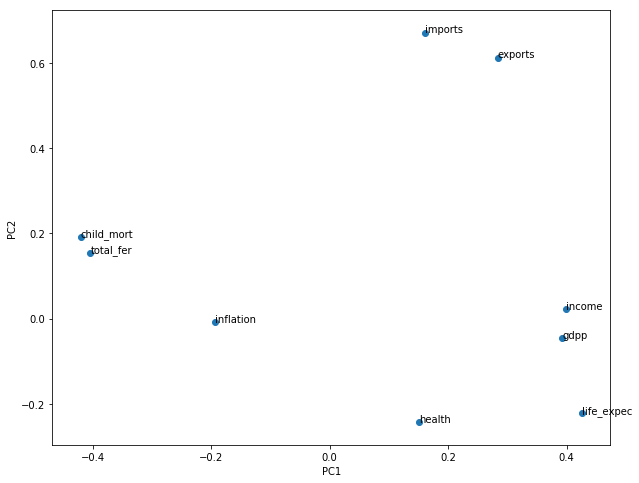

In [22]:

%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.scatter(pcs.PC1, pcs.PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(pcs.Feature):
    plt.annotate(txt, (pcs.PC1[i],pcs.PC2[i]))

plt.show()

### Screeplot

In [23]:
# screeplot to identify the number of needed principal components
myvar= pca.explained_variance_ratio_
myvar1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(myvar1)

[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


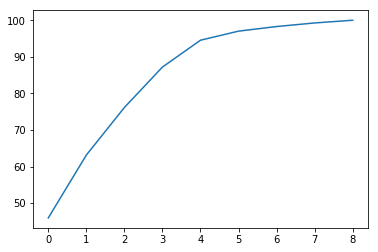

In [24]:
plt.plot(myvar1)
plt.show()

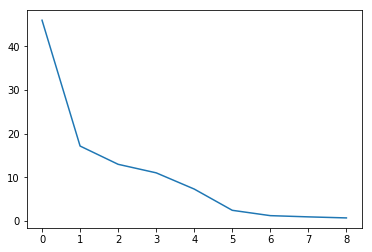

In [25]:
myvar2=np.round(pca.explained_variance_ratio_, decimals=4)*100
plt.plot(myvar2)
plt.show()

<font color = "green" ><b>Observation:</b> According to screeplot, 4 PCs captures above <b>85%</b> of the information from the data set </font>


## 9. Incremental PCA

In [26]:
from sklearn.decomposition import IncrementalPCA

In [27]:
# Basis transformation - getting the data onto our PCs
pca_final = IncrementalPCA(n_components=4)
X_pca_final = pca_final.fit_transform(country_data_norm)
X_pca_final.shape

(167, 4)

#### creating correlation matrix for the principal components

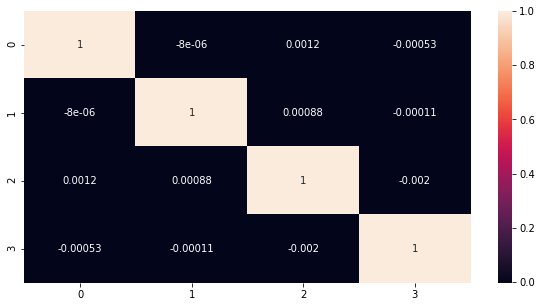

In [28]:
corrmatrix = np.corrcoef(X_pca_final.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmatrix,annot = True)
plt.show()

In [29]:
# 1s -> 0s in diagonals
corrmat_nodiag_final = corrmatrix - np.diagflat(corrmatrix.diagonal())

print("max corr:",corrmat_nodiag_final.max(), ", min corr: ", corrmat_nodiag_final.min(),)

# we see that correlations are indeed very close to 0

max corr: 0.0011961925092544112 , min corr:  -0.002037829535552029


<font color = "green" ><b>Observation:</b> There is no correlation between any two components </font>

<font color = "green" ><b>Observation:</b> We have removed multicollinearity from our situation, and our models will be much more stable  </font>

In [30]:
df_pca_final=pd.DataFrame(X_pca_final)
df_pca_final.columns=['PC1','PC2','PC3','PC4']
df_pca_final.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [31]:
# Get all data into a data frame
country_data_with_pca = pd.concat([country_data,df_pca_final],axis=1)
country_data_with_pca.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.930969,1.699437,-1.521734,0.875966
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808


## 10. Outliers Removal

 - IQR method to remove outliers from PC1, PC2, PC3 and PC4

(165, 14)

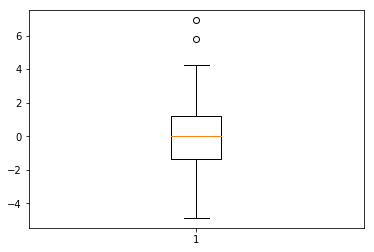

In [32]:
# Remove outliers for the column PC1.
plt.boxplot(country_data_with_pca.PC1)
Q1 = country_data_with_pca.PC1.quantile(0.25)
Q3 = country_data_with_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
country_data_with_pca = country_data_with_pca[(country_data_with_pca.PC1 >= Q1 - 1.5*IQR) 
                                         & (country_data_with_pca.PC1 <= Q3 + 1.5*IQR)]
country_data_with_pca.shape

(162, 14)

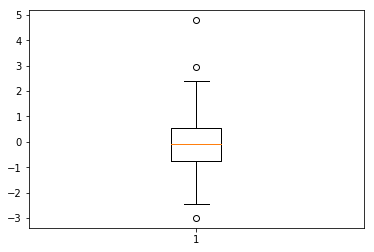

In [33]:
# Remove outliers for the column PC2.
plt.boxplot(country_data_with_pca.PC2)
Q1 = country_data_with_pca.PC2.quantile(0.25)
Q3 = country_data_with_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
country_data_with_pca = country_data_with_pca[(country_data_with_pca.PC2 >= Q1 - 1.5*IQR) 
                                         & (country_data_with_pca.PC2 <= Q3 + 1.5*IQR)]
country_data_with_pca.shape

(149, 14)

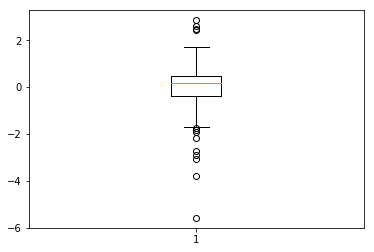

In [34]:
# Remove outliers for the column PC3.
plt.boxplot(country_data_with_pca.PC3)
Q1 = country_data_with_pca.PC3.quantile(0.25)
Q3 = country_data_with_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
country_data_with_pca = country_data_with_pca[(country_data_with_pca.PC3 >= Q1 - 1.5*IQR) 
                                         & (country_data_with_pca.PC3 <= Q3 + 1.5*IQR)]
country_data_with_pca.shape

(149, 14)

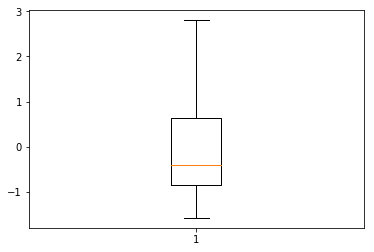

In [35]:
# Remove outliers for the column PC4.
plt.boxplot(country_data_with_pca.PC4)
Q1 = country_data_with_pca.PC4.quantile(0.25)
Q3 = country_data_with_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
country_data_with_pca = country_data_with_pca[(country_data_with_pca.PC4 >= Q1 - 1.5*IQR) 
                                         & (country_data_with_pca.PC4 <= Q3 + 1.5*IQR)]
country_data_with_pca.shape

In [36]:
# Reset the index of the data frame to after outliers removal
country_data_with_pca.reset_index(inplace=True,drop=True)

In [37]:
# Take the data of country,PC1, PC2, PC3 and PC4 into a new data frame which is used to do clustering of countries
country_pca_data = country_data_with_pca[['country','PC1','PC2','PC3','PC4']]
country_pca_data.describe()

,PC1,PC2,PC3,PC4
count,149.000000,149.000000,149.000000,149.000000
mean,-0.154521,-0.128102,0.091439,-0.086190
std,1.860313,0.964371,0.708879,0.925528
min,-4.418771,-2.447021,-1.721711,-1.582161
25%,-1.530134,-0.780158,-0.295254,-0.844808
50%,0.011136,-0.106572,0.212410,-0.403044
75%,1.147616,0.542634,0.486641,0.643550
max,4.087927,2.377580,1.722851,2.804037


In [38]:
# Drop the columns 'country','PC1','PC2','PC3','PC4' from the data frame where outliers are removed
country_data_with_pca.drop(['country','PC1','PC2','PC3','PC4'],axis=1,inplace=True)
country_data_with_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 10. K Means Clustering

In [39]:
# country_data_filtered_norm1 is converted to a data frame
country_pca_data_norm1 =country_pca_data.drop("country", axis=1) 


country_pca_data_norm1.columns = ['PC1','PC2','PC3','PC4']
country_pca_data_norm1.head(10)

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808
5,0.028470,-1.756721,-0.793520,-0.052486
6,-0.102849,-0.567476,-0.277669,-1.458321
7,2.339456,-1.998120,-0.237052,1.132490
8,2.973859,-0.734849,0.548421,1.192561
9,-0.180006,-0.393752,-0.864255,-0.426657


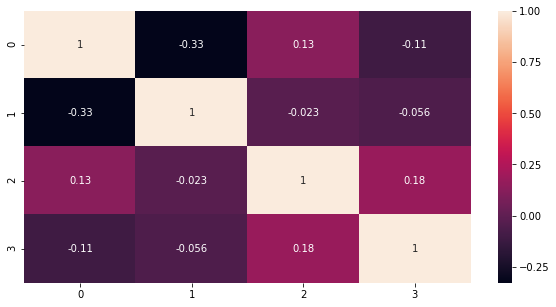

In [40]:
#creating correlation matrix for the principal components
corrmatfinal = np.corrcoef(country_pca_data_norm1.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmatfinal,annot = True)
plt.show()

<font color = "green" ><b>Observation:</b> There is no high co-relation between PC's </font>


## 12. Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [41]:
# Create hopkins function to assess the clustering tendency of a data set 
# by measuring the probability that a given data set is generated by a uniform data distribution.

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [42]:
# Check the probabiltiy
hopkins(country_pca_data_norm1)

0.6699952294989282

### Observation

Hopkins value varies when ever you run multiple times and the value is almost equla to or greater than .7. So data has tendency for clustering

## 13. K-Means with some K = 4

In [43]:
# import the required libraries to perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
# Let us do a clustering with k=4 and max_iter=100, 4 is choosen as a random number
model_clus4 = KMeans(n_clusters = 4, max_iter=100)
model_clus4.fit(country_pca_data_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
# Concat the original filtered data  with the model built to get the actual clusters of the countries
country_pca_data.index = pd.RangeIndex(len(country_pca_data.index))
country_pca_data_km4 = pd.concat([country_pca_data, pd.Series(model_clus4.labels_),country_data_with_pca], axis=1)
country_pca_data_km4.columns = ['country','PC1','PC2','PC3','PC4','ClusterID','child_mort','exports','health',
                                   'imports','income','inflation','life_expec','total_fer','gdpp']
country_pca_data_km4.head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,3,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429358,-0.587859,0.321052,-1.171193,2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.930969,1.699437,-1.521734,0.875966,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [46]:
# Calculate the mean value of each variable fromt hte data set country_data_filtered_km4
# Data is stored in separate data set 
km4_clusters_pc1 = pd.DataFrame(country_pca_data_km4.groupby(["ClusterID"]).child_mort.mean())
km4_clusters_pc2 = pd.DataFrame(country_pca_data_km4.groupby(["ClusterID"]).exports.mean())

km4_clusters_pc3 = pd.DataFrame(country_pca_data_km4.groupby(["ClusterID"]).health.mean())
km4_clusters_pc4 = pd.DataFrame(country_pca_data_km4.groupby(["ClusterID"]).imports.mean())

In [47]:
# Average values are concatenated into a single dataset
df_km4 = pd.concat([pd.Series([0,1,2,3]), km4_clusters_pc1, km4_clusters_pc2,km4_clusters_pc3,
               km4_clusters_pc4], axis=1)
df_km4.columns = ["ClusterID",'child_mort','exports','health',
                                   'imports']
df_km4

,ClusterID,child_mort,exports,health,imports
0,0,37.663415,28.599488,5.307073,32.469900
1,1,4.159091,42.018182,10.177727,39.268182
2,2,14.788462,49.550000,6.983462,57.669231
3,3,101.058824,29.391765,6.252353,41.370588


In [48]:
# Display the count of countries across each cluster
country_pca_data_km4.groupby('ClusterID')['ClusterID'].count().sort_values()

ClusterID
1    22
3    34
0    41
2    52
Name: ClusterID, dtype: int64

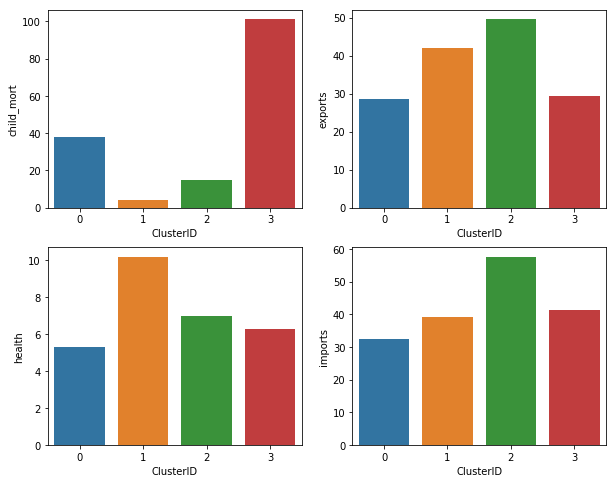

In [49]:
# Verify whether the above observation is correct or not. 
# This can be verifed using barcharts against ClusterId vs Average values
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
sns.barplot(x=df_km4.ClusterID, y=df_km4.child_mort)
plt.subplot(2,2,2)
sns.barplot(x=df_km4.ClusterID, y=df_km4.exports)
plt.subplot(2,2,3)
sns.barplot(x=df_km4.ClusterID, y=df_km4.health)
plt.subplot(2,2,4)
sns.barplot(x=df_km4.ClusterID, y=df_km4.imports)
plt.show()

In [50]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_km4[country_pca_data_km4['ClusterID']==1].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,2.339456,-1.998120,-0.237052,1.132490,1,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,2.973859,-0.734849,0.548421,1.192561,1,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,3.145437,0.667278,0.708087,1.067254,1,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
28,Canada,2.543935,-1.726562,0.421128,1.327507,1,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
43,Denmark,3.011286,-0.863838,0.377635,1.776832,1,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000


In [51]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_km4[country_pca_data_km4['ClusterID']==0].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,0,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,0,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,0,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840
12,Bangladesh,-1.127417,-0.968982,-0.611645,-1.163111,0,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758


In [52]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_km4[country_pca_data_km4['ClusterID']==2].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,0.429358,-0.587859,0.321052,-1.171193,2,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,2,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
10,Bahamas,1.266074,-0.665088,0.453533,0.059479,2,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
11,Bahrain,1.670737,0.560394,-1.020168,-0.178515,2,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
13,Barbados,1.080093,-0.486679,0.649528,-0.533559,2,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000


In [53]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_km4[country_pca_data_km4['ClusterID']==3].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,3,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
3,Angola,-2.930969,1.699437,-1.521734,0.875966,3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,-2.679195,0.391235,0.139349,0.321834,3,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
24,Burkina Faso,-3.125200,0.023315,0.410699,1.096936,3,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
25,Burundi,-2.895611,-0.419723,1.434451,1.773143,3,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231


<font color = "Red" > <h2> Observation </h1></font>
<font color = "Green" >
<br>- Countries are clustered into 3 categories based on 4 PC's
<br>- Clusters can be classified as </br>
<br>- Cluster 1 - Countries which are economically poor and require large amount of help
<br>- Cluster 0 - Countries which are economically above poor and require some amount of help
<br>- Cluster 2 - Countries which are economically average and require very minimal amount of help
<br>- Cluster 3 - Countries which are economically strong and may not require any help
</font>

### Silhouette Analysis

Let us do Silhouette Analysis to get the value of K

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [54]:
# import the required libraries to perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

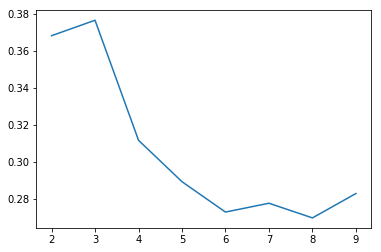

In [55]:
sse3_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(country_pca_data_norm1)
    sse3_.append([k, silhouette_score(country_pca_data_norm1, kmeans.labels_)])
plt.plot(pd.DataFrame(sse3_)[0], pd.DataFrame(sse3_)[1]);
plt.show()

### Sum of Squared Distances

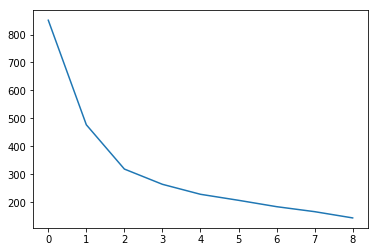

In [56]:
# sum of squared distances
ssd3 = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_pca_data_norm1)
    ssd3.append(model_clus.inertia_)

plt.plot(ssd3)
plt.show()

### Observation

 It is required to take K=3 based on Silhouette Analysis. Let us categorize countries with K = 3

## 14. K-Means with  K = 3

In [57]:
# Let us do a clustering with k=3 and max_iter=100
model_clus3 = KMeans(n_clusters = 3, max_iter=100)
model_clus3.fit(country_pca_data_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
# Concat the original filtered data  with the model built to get the actual clusters of the countries
country_pca_data.index = pd.RangeIndex(len(country_pca_data.index))
country_pca_data_km3 = pd.concat([country_pca_data, pd.Series(model_clus3.labels_),country_data_with_pca], axis=1)
country_pca_data_km3.columns = ['country','PC1','PC2','PC3','PC4','ClusterID','child_mort','exports','health',
                                   'imports','income','inflation','life_expec','total_fer','gdpp']
country_pca_data_km3.head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429358,-0.587859,0.321052,-1.171193,2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.930969,1.699437,-1.521734,0.875966,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [59]:
# Calculate the mean value of each variable fromt hte data set country_data_filtered_km3
# Data is stored in separate data set 
km3_clusters_pc1 = pd.DataFrame(country_pca_data_km3.groupby(["ClusterID"]).child_mort.mean())
km3_clusters_pc2 = pd.DataFrame(country_pca_data_km3.groupby(["ClusterID"]).exports.mean())

km3_clusters_pc3 = pd.DataFrame(country_pca_data_km3.groupby(["ClusterID"]).health.mean())
km3_clusters_pc4 = pd.DataFrame(country_pca_data_km3.groupby(["ClusterID"]).imports.mean())

In [60]:
# Average values are concatenated into a single dataset
df_km3 = pd.concat([pd.Series([0,1,2]), km3_clusters_pc1, km3_clusters_pc2,km3_clusters_pc3,
               km3_clusters_pc4], axis=1)
df_km3.columns = ["ClusterID",'child_mort','exports','health',
                                   'imports']
df_km3

,ClusterID,child_mort,exports,health,imports
0,0,4.521429,45.200000,9.670714,43.389286
1,1,92.732558,29.604884,6.069535,39.495349
2,2,22.135897,40.183192,6.223718,47.273922


In [61]:
## Display the count of countries across each cluster
country_pca_data_km3.groupby('ClusterID')['ClusterID'].count().sort_values()

ClusterID
0    28
1    43
2    78
Name: ClusterID, dtype: int64

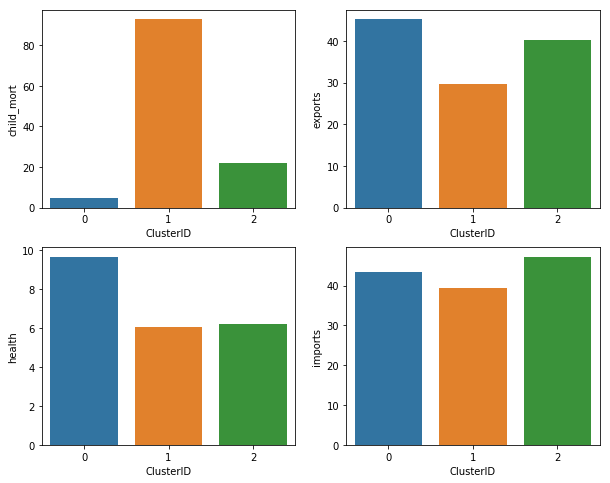

In [62]:
# Verify whether the above observation is correct or not. 
# This can be verifed using barcharts against ClusterId vs Average values
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
sns.barplot(x=df_km3.ClusterID, y=df_km3.child_mort)
plt.subplot(2,2,2)
sns.barplot(x=df_km3.ClusterID, y=df_km3.exports)
plt.subplot(2,2,3)
sns.barplot(x=df_km3.ClusterID, y=df_km3.health)
plt.subplot(2,2,4)
sns.barplot(x=df_km3.ClusterID, y=df_km3.imports)
plt.show()

In [63]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_km3[country_pca_data_km3['ClusterID']==2].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,0.429358,-0.587859,0.321052,-1.171193,2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,2,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,2,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220


In [64]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_km3[country_pca_data_km3['ClusterID']==1].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,1,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
3,Angola,-2.930969,1.699437,-1.521734,0.875966,1,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,-2.679195,0.391235,0.139349,0.321834,1,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
21,Botswana,-0.881545,0.461932,0.620368,0.384517,1,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350
24,Burkina Faso,-3.125200,0.023315,0.410699,1.096936,1,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575


In [65]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_km3[country_pca_data_km3['ClusterID']==0].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,2.339456,-1.998120,-0.237052,1.132490,0,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,2.973859,-0.734849,0.548421,1.192561,0,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
10,Bahamas,1.266074,-0.665088,0.453533,0.059479,0,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
15,Belgium,3.145437,0.667278,0.708087,1.067254,0,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
28,Canada,2.543935,-1.726562,0.421128,1.327507,0,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400


<font color = "Red" > <h2> Observation </h1></font>
<font color = "Green" >
<br>- Countries are clustered into 3 categories based on 4 PC's
<br>- Clusters can be classified as </br>
<br>- Cluster 2 - Countries which are economically poor and require large amount of help
<br>- Cluster 1 - Countries which are economically average and require some amount of help
<br>- Cluster 0 - Countries which are economically strong and may not require any help
</font>

### Get the countries list

In [66]:
country_pca_data_km3[country_pca_data_km3['ClusterID']==0].country.tolist()

['Australia',
 'Austria',
 'Bahamas',
 'Belgium',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom']

In [67]:
country_pca_data_km3[country_pca_data_km3['ClusterID']==1].country.tolist()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Lao',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [68]:
country_pca_data_km3[country_pca_data_km3['ClusterID']==2].country.tolist()

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Serbia',
 'Solomon Islands',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Thailand',
 'Tonga',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Ukraine',
 'Uruguay'

## 15. Hierarchical clustering

In [69]:
# Import required libraries to perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

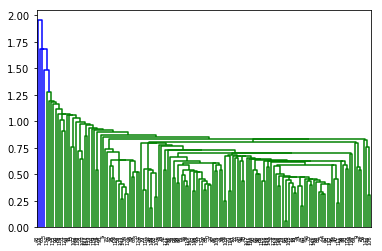

In [70]:
# Dendrogram with method='single'
mergings = linkage(country_pca_data_norm1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

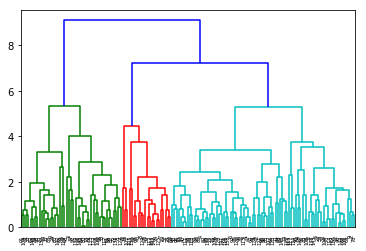

In [71]:
# Dendrogram with method='complete'
mergings = linkage(country_pca_data_norm1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Observation

- Dendrogram with methoud = 'complete' gives a very good Hierarchial cluster. To identify K we can use either Divisive clustering (top to bottom approach) or Agglomerative clustering (bottom to top approach). I will consider Divisive approach as it looks easy in this case. 
- We can cut the Dendrogram at slightly at 6 and we get the value of number of cluster= 3. We use this value to categorize the countries

In [72]:
# Cut the tree  at K=3 and assign the values to cluster
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))

country_pca_data_hc = pd.concat([country_pca_data, clusterCut,country_data_with_pca], axis=1)
country_pca_data_hc.columns = ['country','PC1','PC2','PC3','PC4','ClusterID','child_mort','exports','health',
                                   'imports','income','inflation','life_expec','total_fer','gdpp']
country_pca_data_hc.head(10)

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,0.429358,-0.587859,0.321052,-1.171193,1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,1,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,-2.930969,1.699437,-1.521734,0.875966,0,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,1,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,1,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,1,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,2.339456,-1.998120,-0.237052,1.132490,2,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,2.973859,-0.734849,0.548421,1.192561,2,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,1,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [73]:
# Calculate the mean value of each variable fromt hte data set country_data_filtered_hc
# Data is stored in separate data set 
hc_clusters_pc1 = pd.DataFrame(country_pca_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_pc2 = pd.DataFrame(country_pca_data_hc.groupby(["ClusterID"]).exports.mean())

hc_clusters_pc3 = pd.DataFrame(country_pca_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_pc4 = pd.DataFrame(country_pca_data_hc.groupby(["ClusterID"]).income.mean())


In [74]:
# Average values are concatenated into a single dataset
df_hc = pd.concat([pd.Series([0,1,2]), hc_clusters_pc1, hc_clusters_pc2,hc_clusters_pc3,
               hc_clusters_pc4], axis=1)
df_hc.columns = ["ClusterID",'child_mort_Ave','exports_Ave','health_Ave',
                                   'income_Ave']
df_hc

,ClusterID,child_mort_Ave,exports_Ave,health_Ave,income_Ave
0,0,85.942222,35.058222,6.024222,4108.511111
1,1,22.948780,38.669256,6.368537,13075.853659
2,2,4.159091,42.018182,10.177727,39850.000000


In [75]:
# Display the count of countries across each cluster
country_pca_data_hc.groupby('ClusterID')['ClusterID'].count().sort_values()

ClusterID
2    22
0    45
1    82
Name: ClusterID, dtype: int64

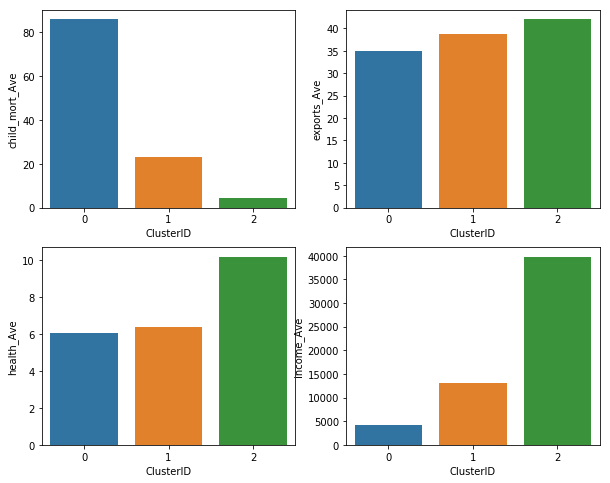

In [76]:
# Verify whether the above observation is correct or not. 
# This can be verifed using barcharts against ClusterId vs Average values
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
sns.barplot(x=df_hc.ClusterID, y=df_hc.child_mort_Ave)
plt.subplot(2,2,2)
sns.barplot(x=df_hc.ClusterID, y=df_hc.exports_Ave)
plt.subplot(2,2,3)
sns.barplot(x=df_hc.ClusterID, y=df_hc.health_Ave)
plt.subplot(2,2,4)
sns.barplot(x=df_hc.ClusterID, y=df_hc.income_Ave)
plt.show()

### Observation

Countries are clustered into 3 categories based on PC's. We can observe that both K menans when K =3 and Hierarchial cluster when cutted at 3rd level gives almost same result

In [77]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_hc[country_pca_data_hc['ClusterID']==0].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
3,Angola,-2.930969,1.699437,-1.521734,0.875966,0,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,-2.679195,0.391235,0.139349,0.321834,0,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
18,Bhutan,-0.157595,0.777245,0.269734,-1.046412,0,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180
21,Botswana,-0.881545,0.461932,0.620368,0.384517,0,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350


In [78]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_hc[country_pca_data_hc['ClusterID']==1].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,0.429358,-0.587859,0.321052,-1.171193,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,1,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,1,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220


In [79]:
# Let us verify the top 5 countires base on the clusters ids
country_pca_data_hc[country_pca_data_hc['ClusterID']==2].head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,2.339456,-1.998120,-0.237052,1.132490,2,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,2.973859,-0.734849,0.548421,1.192561,2,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,3.145437,0.667278,0.708087,1.067254,2,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
28,Canada,2.543935,-1.726562,0.421128,1.327507,2,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
43,Denmark,3.011286,-0.863838,0.377635,1.776832,2,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000


<font color = "Red" > <h2> Observation </h1></font>
<font color = "Green" >
<br>- Countries are clustered into 3 categories based on 4 PC's
<br>- Clusters can be classified as </br>
<br>- Cluster 0 - Countries which are economically poor and require large amount of help
<br>- Cluster 1 - Countries which are economically average and require some amount of help
<br>- Cluster 2 - Countries which are economically strong and may not require any help
</font>

## Get the countries list

#### Countries which are economically poor and require large amount of help

In [80]:
country_pca_data_hc[country_pca_data_hc['ClusterID']==0].country.tolist()

['Afghanistan',
 'Angola',
 'Benin',
 'Bhutan',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Fiji',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kyrgyz Republic',
 'Lao',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Tajikistan',
 'Tanzania',
 'Togo',
 'Turkmenistan',
 'Uganda',
 'Vanuatu',
 'Zambia']

#### Countries which are economically average and require some amount of help 

In [81]:
country_pca_data_hc[country_pca_data_hc['ClusterID']==1].country

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
19                            Bolivia
20             Bosnia and Herzegovina
22                             Brazil
23                           Bulgaria
29                         Cape Verde
32                              Chile
33                              China
34                           Colombia
38                         Costa Rica
40                            Croatia
41                             Cyprus
42                     Czech Republic
44                 Dominican Republic
45                            Ecuador
46          

#### Countries which are economically strong and may not require any help

In [82]:
country_pca_data_hc[country_pca_data_hc['ClusterID']==2].country

7           Australia
8             Austria
15            Belgium
28             Canada
43            Denmark
52            Finland
53             France
57            Germany
59             Greece
67            Iceland
72            Ireland
73             Israel
74              Italy
76              Japan
102       Netherlands
103       New Zealand
105            Norway
112          Portugal
125             Spain
129            Sweden
130       Switzerland
142    United Kingdom
Name: country, dtype: object

------------------------------------------End Of File------------------------------------------------